## FINAL PROJECT

### TELCO CHURN PREDICTION
#### SECTION 4 - FEATURE SELECTION AND MODEL DEPLOYMENT

Since using all of the features we find in the dataset might not be useful in building a machine learning model, mostly in order to make the necessary prediction, ***Feature Selection*** would play a huge role in building a machine learning model. Therefore the goal of this section is to select the best features possible for the previous selected model using two variations and finally deploy the model to Dashboard.

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold , cross_val_score

from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_ready.csv')

In [3]:
df.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### FEATURE SELECTION USING CORRELATION

Correlation is an alternative method to select best features, it states how the features are related to each other or the target variable. This can be positive, meaning an increase in one value of feature increases the value of the target variable or negative, meaning an increase in one value of feature decreases the value of the target variable.

In [4]:
df_corr = df.copy()

In [5]:
corr_feat = df_corr.corr()['Churn'].sort_values(ascending = False)

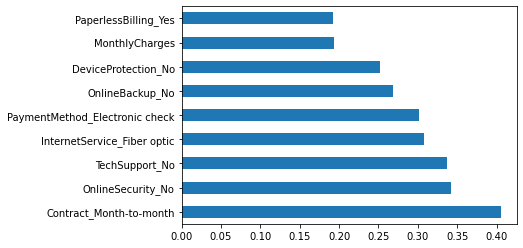

In [6]:
corr_feat[1:10].plot(kind= 'barh')

We can see by the plot above, that some variables have might a positive relation to our target variable - Churn, while in plot below, some have negative relation. Positive relation meaning that the likeness of customer's churn increases by those vaiables, while in contrary, negative relation means that likeliness of churn decreases by that variable.

As mentioned in EDA, by having a one to two years contract along with tenure have the most negative relation with churn. Having DSL internet service also reduces the proability of churn. Lastly, total charges, monthly contracts, fiber optic internet services can lead to higher churn rates. This is interesting, although fiber optic services are actually faster, customers are likely to churn because of it.

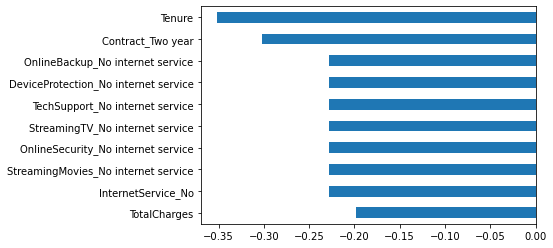

In [7]:
corr_feat[-10:].plot(kind= 'barh')

In [8]:
df_new = df_corr[['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 
                  'OnlineBackup_No', 'DeviceProtection_No', 'PaperlessBilling_Yes', 'Contract_Two year', 'Tenure', 'MonthlyCharges']]

In [9]:
df_new.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,PaperlessBilling_Yes,Contract_Two year,Tenure,MonthlyCharges
0,0,1,1,1,0,1,0,1,1,0,0.013889,0.115423
1,0,0,0,1,0,0,1,0,0,0,0.472222,0.385075
2,1,1,0,1,0,0,0,1,1,0,0.027778,0.354229
3,0,0,0,0,0,0,1,0,0,0,0.625000,0.239303
4,1,1,1,1,1,1,1,1,1,0,0.027778,0.521891


Now we've got our top features, let's try to build the model and see the performances.

### MODELLING

In [10]:
# splitting target 

x1 = df_new.drop(columns = ['Churn'])
y1 = df_new['Churn'].values

In [11]:
# Split train data 90%

x1_train, x1_test, y1_train, y1_test =  train_test_split(x1, y1, train_size = 0.9, shuffle = False)

# Model Best Parameter

KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(x1_train, y1_train)

In [12]:
# Predict using Logistic Regression

yp_KNN1 = KNN1_best.predict(x1_test)

In [13]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.83      0.89      0.86       510
     Churned       0.64      0.54      0.59       195

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



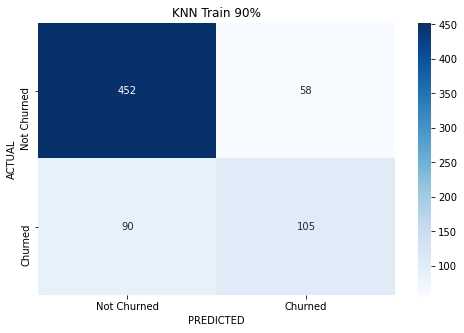

In [14]:
# Model evaluation

print(classification_report(y1_test, yp_KNN1, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, yp_KNN1), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN Train 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

It would seems that using these features / variables are causing a slight reduction on our recall of the churn customers. Therefore let's try to adding more variables, and see if the recall can be increased.

In [15]:
# adding No Internet Service, OnlineBackup No internet services, DeviceProtection_No internet service

df_new2 = df_corr[['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'OnlineBackup_No', 'DeviceProtection_No', 
                   'PaperlessBilling_Yes', 'InternetService_No', 'Contract_Two year', 'MonthlyCharges', 'Tenure', 'InternetService_No', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service']]

In [16]:
df_new2.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,PaperlessBilling_Yes,InternetService_No,Contract_Two year,MonthlyCharges,Tenure,InternetService_No,OnlineBackup_No internet service,DeviceProtection_No internet service
0,0,1,1,1,0,1,0,1,1,0,0,0.115423,0.013889,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0.385075,0.472222,0,0,0
2,1,1,0,1,0,0,0,1,1,0,0,0.354229,0.027778,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0.239303,0.625000,0,0,0
4,1,1,1,1,1,1,1,1,1,0,0,0.521891,0.027778,0,0,0


In [17]:
# splitting target

x2 = df_new2.drop(columns = ['Churn'])
y2 = df_new2['Churn'].values

In [18]:
# Split train data 80%

x2_train, x2_test, y2_train, y2_test =  train_test_split(x2, y2, train_size = 0.9, shuffle = False)

# Model Best Parameter

KNN2_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(x2_train, y2_train)

In [19]:
# Predict using Logistic Regression

yp_KNN2 = KNN2_best.predict(x2_test)

              precision    recall  f1-score   support

 Not Churned       0.83      0.89      0.86       510
     Churned       0.64      0.54      0.59       195

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



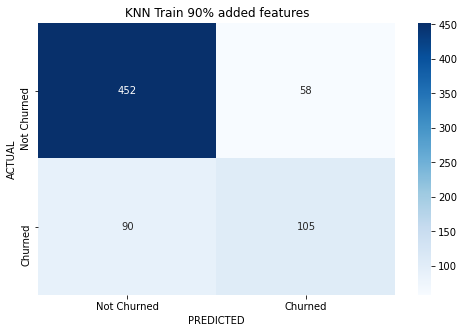

In [20]:
# Model evaluation

print(classification_report(y2_test, yp_KNN2, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y2_test, yp_KNN2), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN Train 90% added features')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

So it would seems that there are no changes whatsoever on the model performances if we add more features into it. Therefore we will choose the previous one.

### MODEL TESTING AND DEPLOYMENT

In [21]:
model = KNN1_best

Let's try to predict the data using Logistic Regression Model that we've picked. I'll try to pick it randomly from our data.

In [22]:
df_new.loc[df_new['Churn']==0].tail()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,PaperlessBilling_Yes,Contract_Two year,Tenure,MonthlyCharges
7037,0,0,0,0,0,0,0,0,1,1,1.000000,0.028856
7038,0,0,0,0,0,0,1,0,1,0,0.333333,0.662189
7039,0,0,1,1,1,0,0,0,1,0,1.000000,0.845274
7040,0,1,0,1,0,1,1,1,1,0,0.152778,0.112935
7042,0,0,0,0,1,0,1,0,1,1,0.916667,0.869652


In [23]:
df_new.loc[df_new['Churn']==1].tail()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,PaperlessBilling_Yes,Contract_Two year,Tenure,MonthlyCharges
7021,1,0,1,0,0,1,1,1,1,0,0.166667,0.413433
7026,1,1,1,1,0,0,1,1,1,0,0.125000,0.258209
7032,1,1,1,1,1,1,1,1,1,0,0.013889,0.572139
7034,1,1,0,1,1,0,0,0,1,0,0.930556,0.842786
7041,1,1,1,1,1,0,1,1,1,0,0.055556,0.558706


In [24]:
df_noch = df_new.loc[df_new['Churn']==0].tail().drop(columns = ['Churn'], axis = 1).T
df_chrn = df_new.loc[df_new['Churn']==1].tail().drop(columns = ['Churn'], axis = 1).T

In [25]:
# Predict Not Churned

for i in df_noch :
    model = KNN1_best
    df_noch[i] = df_noch[i].ravel().tolist()
    pred = round(model.predict_proba([df_noch[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 0.0%
Customer Not Churned - Probability is 16.0%
Customer Not Churned - Probability is 20.0%
Customer Not Churned - Probability is 32.0%
Customer Not Churned - Probability is 12.0%


Well it seems that this model could correctly predict all of the Not Churned customers as the probability of Churn is still below 50%. Let's try to predict the Churned customers.

In [26]:
# Predict Churned

for i in df_chrn :
    model = KNN1_best
    df_chrn[i] = df_chrn[i].ravel().tolist()
    pred = round(model.predict_proba([df_chrn[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 36.0%
Customer Not Churned - Probability is 40.0%
Customer Churned     - Probability is 96.0%
Customer Not Churned - Probability is 24.0%
Customer Churned     - Probability is 68.0%


As we can see, out of five predictions, this model only predicted right about two times. This would seems be caused by the somewhat low recall, I'll try to tweak it one more time to see if this problem still persist.

In [27]:
# Oversampling with SMOTE

x_train_sm, y_train_sm = SMOTE(random_state = False).fit_sample(x1_train, y1_train)

# Model Best Parameter oversampled

KNN1_best_sm = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(x_train_sm, y_train_sm)

In [28]:
# Predict using Logistic Regression oversampled

yp_KNN_sm = KNN1_best_sm.predict(x1_test)

              precision    recall  f1-score   support

 Not Churned       0.89      0.72      0.80       510
     Churned       0.52      0.77      0.62       195

    accuracy                           0.74       705
   macro avg       0.70      0.75      0.71       705
weighted avg       0.79      0.74      0.75       705



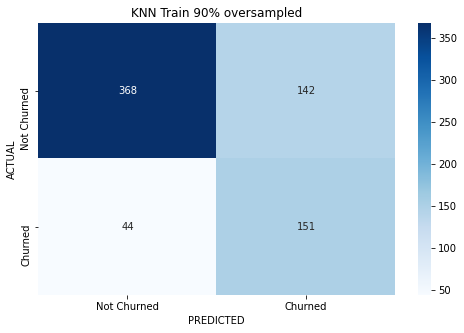

In [29]:
# Model evaluation

print(classification_report(y1_test, yp_KNN_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, yp_KNN_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN Train 90% oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

Although it greatly lowers the accuracy and precision, personally I think the oversampled version is a better model for predicting especially in this business field. As of in this type of field the higher the recall the better, but of course we'll need to consider the other parameters, such as accuracy, precision, and f1 score. But for now let's continue to see if this is the better model than before.

In [30]:
model_sm = KNN1_best_sm

In [31]:
# Predict Not Churned

for i in df_noch :
    model = KNN1_best_sm
    df_noch[i] = df_noch[i].ravel().tolist()
    pred = round(model.predict_proba([df_noch[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 0.0%
Customer Not Churned - Probability is 24.0%
Customer Not Churned - Probability is 48.0%
Customer Churned     - Probability is 68.0%
Customer Not Churned - Probability is 24.0%


As we can see above, although using a rather *'balanced'* data with oversampling technique would seems that increasing the recall, but at the same time, it greatly lowers the performance of this model instead. But the test concluded that out of five predictions, it predicted four right, as the non balanced data before predicted everything right. But let's see how well this balanced models predict the churned customers.

In [32]:
# Predict Churned

for i in df_chrn :
    model = KNN1_best_sm
    df_chrn[i] = df_chrn[i].ravel().tolist()
    pred = round(model.predict_proba([df_chrn[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Churned     - Probability is 68.0%
Customer Churned     - Probability is 64.0%
Customer Churned     - Probability is 96.0%
Customer Not Churned - Probability is 48.0%
Customer Churned     - Probability is 96.0%


It seems that this model got one wrong in predicting the Churned customers. But in conclusion, we can say that although it increasing the recall by a significant amount, the *'balanced'* version of this model might just greatly lowering the overall model performances. But in the end, I would choose this version instead as I think it's rather balanced in predicting both sides. But before that, let's check the model if it's ovefit or underfit.

In [33]:
KNN1_sm_tr = KNN1_best_sm.score(x1_train,y1_train)
KNN1_sm_ts = KNN1_best_sm.score(x1_test,y1_test)
print(f'train score : {KNN1_sm_tr} || test score : {KNN1_sm_ts}')

train score : 0.7541811296939097 || test score : 0.7361702127659574


By the scoring above, I think this oversampled model is really stable. There are no sign of overfitting as the train and test score are stable. Let's try to prove it by using kfold.

In [34]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
KNN1_sm_kfold = cross_val_score(KNN1_best_sm, x1_train, y1_train, cv = cv, scoring = 'accuracy')

print(f"KNN Kfold cross-val : {KNN1_sm_kfold}")
print(f"Average KNN Kfold cross-val : {KNN1_sm_kfold.mean()}")

KNN Kfold cross-val : [0.79495268 0.80599369 0.77602524 0.78391167 0.79495268 0.81072555
 0.76182965 0.7807571  0.80094787 0.77883096]
Average KNN Kfold cross-val : 0.7888927095947892


The kfold proves that there are no drastic differences between this and previous scores. Therefore we can conclude that there are no overfitting on model. Then finally we'll dump this model with *joblib* to apply it later into the dashboard to complete this project.

              precision    recall  f1-score   support

 Not Churned       0.89      0.72      0.80       510
     Churned       0.52      0.77      0.62       195

    accuracy                           0.74       705
   macro avg       0.70      0.75      0.71       705
weighted avg       0.79      0.74      0.75       705



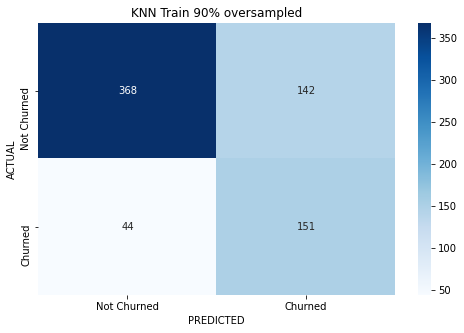

In [35]:
print(classification_report(y1_test, yp_KNN_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, yp_KNN_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN Train 90% oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [36]:
joblib.dump(model_sm, 'modelKNN')

['modelKNN']

***Exporting Data to Dashboard***

In [37]:
df_dash = pd.read_csv('Telco-Customer-Churn-Clean.csv').drop(columns = 'customerID', axis =1)

In [42]:
df_dash_cat = df_dash.loc[:, df_dash.dtypes == np.object]
df_dash_con = df_dash.loc[:, df_dash.dtypes != np.object]

In [43]:
df_dash_cat = pd.get_dummies(df_dash_cat)

In [46]:
df_dash = pd.concat([df_dash_cat, df_dash_con], axis=1)

In [47]:
df_dash.head()

,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1


In [49]:
df_dash.to_csv('df_dash.csv')